In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Please Download Dataset: https://www.kaggle.com/datasets/abhinavkrjha/dog-breed-classification/download?datasetVersionNumber=1

In [2]:
data_path='C:/Users/91994/Desktop/Deep Learning/CNN/Dog Breed Prediction/Dogs_dataset'

In [3]:
categories=os.listdir(data_path)
categories

['Affenhuahua dog',
 'Afgan Hound dog',
 'Akita dog',
 'Alaskan Malamute dog',
 'American Bulldog dog',
 'Auggie dog',
 'Beagle dog',
 'Belgian Tervuren dog',
 'Bichon Frise dog',
 'Bocker dog',
 'Borzoi dog',
 'Boxer dog',
 'Bugg dog',
 'Bulldog dog']

In [4]:
labels= [i for i in range(len(categories))]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [5]:
labels_dict =dict(zip(categories,labels))

In [6]:
labels_dict

{'Affenhuahua dog': 0,
 'Afgan Hound dog': 1,
 'Akita dog': 2,
 'Alaskan Malamute dog': 3,
 'American Bulldog dog': 4,
 'Auggie dog': 5,
 'Beagle dog': 6,
 'Belgian Tervuren dog': 7,
 'Bichon Frise dog': 8,
 'Bocker dog': 9,
 'Borzoi dog': 10,
 'Boxer dog': 11,
 'Bugg dog': 12,
 'Bulldog dog': 13}

In [7]:
img_size=100
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path, category)
    image_names=os.listdir(folder_path)
    for img_name in image_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # gray image conversion
            resized = cv2.resize(gray_img,(img_size,img_size)) # resize every image to uniform size
            data.append(resized)
            target.append(labels_dict[category])
        except Exception as e:
            print("Exception",e)      

Exception OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



Affenhuahua dog
Affenhuahua dog
Affenhuahua dog
Affenhuahua dog


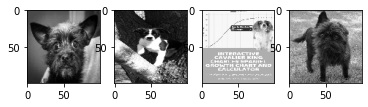

In [8]:
plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(data[i],cmap='gray')
    print(categories[target[i]])
plt.show()

In [9]:
data = np.array(data)/255 # Scaling
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

In [10]:
data.shape

(694, 100, 100, 1)

In [11]:
from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [12]:
np.save('data',data)
np.save('target',new_target)